
# World Happiness Analysis

### Chen Xinyi, Dong Yunxing, Joseph Fung King Yiu
---

# Problem 1: Which continent is the happiest/least happiest? 

#  (K prototypes clustering)

## Import modules
---

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 


# Country converter
import country_converter as coco
import pycountry_convert as pypi

#plotly for world map
import plotly.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

#clustering
from kmodes.kprototypes import KPrototypes

import warnings
warnings.filterwarnings("ignore")


## Import Dataset
---

In [2]:
happinessData = pd.read_excel('data.xls')
print("Number of Countries :", len(happinessData["country"].unique()))
happinessData.head()

Number of Countries : 164


,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [3]:
happinessData.info()
happinessData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
country                                                     1562 non-null object
year                                                        1562 non-null int64
Life Ladder                                                 1562 non-null float64
Log GDP per capita                                          1535 non-null float64
Social support                                              1549 non-null float64
Healthy life expectancy at birth                            1553 non-null float64
Freedom to make life choices                                1533 non-null float64
Generosity                                                  1482 non-null float64
Perceptions of corruption                                   1472 non-null float64
Positive affect                                             1544 non-null float64
Negative affect                                             1550 non-null fl

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


## 1. EDA: Visualizing Happiness Score on a World Map! 
---

Selecting the last row for each country. As some country does not have Life Ladder(Happiness) Score for the year 2017, this function is created to take the latest Happiness Score for each country which is 2017 in most cases.One such country that does not have happiness score for 2017 is Canada.

In [4]:
country_list =list(set(list(happinessData["country"])))


print(len(country_list))

df_by_countries = []
for name in country_list:
    df = happinessData.loc[happinessData['country'] == name]
    df_by_countries.append(df)

last_row = []
for country in df_by_countries:
    df =country[-1:]
    last_row.append(df)
    
last_row_df = pd.concat(last_row)

164


Plotly is used below to visualize the different countries with various happiness scores on the world map. Try to find Singapore and find out its happiness score. Hint: Little Red Dot (Literally)! Keep zooming in. Lighter colours represent higher happiness scores.

In [5]:
data6 = dict(type = 'choropleth', 
           locations = last_row_df['country'],
           locationmode = 'country names',
           z = last_row_df['Life Ladder'], 
           text = last_row_df['country'],
          colorscale = 'Viridis', reversescale = False)
layout = dict(width=900,height=500,title = 'Happiness Score Around the world', 
             geo = dict(resolution = 50, showframe = False, projection = {'type': 'equirectangular'}))
choromap6 = go.Figure(data = [data6], layout=layout)
iplot(choromap6)

We can observe from the map above that some very happy countries are clustered together in certain continents. This inspires us to find out the happiest/least happiest continent using the clustering model.

## 2. Data Preparation
---

### 2.1 Find the average happiness score from 2014 to 2017

In [6]:
happinessData_clustering = pd.DataFrame(happinessData[['Life Ladder','country','year']])

country_list = list(set(list(happinessData_clustering["country"])))
df_by_countries = []

for name in country_list:
    df = happinessData_clustering.loc[happinessData_clustering['country'] == name]
    df_by_countries.append(df)


# try to find the life ladder score in each country for years 2014 to 2017
# count the number of years
# take ths sum
# average = sum/counter

df_by_countries_average2014_2017 = []


for df in df_by_countries:
    for var in df:
        if var != 'country' and var != 'year':
            counter_1 = 0
            sum_1 = 0

            for i in range(len(df) - 1):
                if df['year'].iloc[i] == 2014 or df['year'].iloc[i] == 2015 or df['year'].iloc[i]== 2016 or df['year'].iloc[i] == 2017:
                    sum_1 += df[var].iloc[i]
                    counter_1 +=1

            if counter_1 != 0:
                average_1 = sum_1 / counter_1
                df[var].iloc[0] =  average_1
            else:
                df[var].iloc[0] =  average_1

    df = df[:1]

    df_by_countries_average2014_2017.append(df)

average_data = pd.concat(df_by_countries_average2014_2017, ignore_index = True) 

average_data_cleaned = average_data.loc[average_data['Life Ladder'] != 0]
average_data_cleaned = average_data_cleaned.drop(['year'],axis =1)

### 2.2 Create a continent variable and find out which continent each country belongs to 

In [7]:
average_data_cleaned["Continent"] = None
average_data_cleaned.head()

,Life Ladder,country,Continent
0,3.495280,Togo,None
1,5.620301,Cyprus,None
2,6.699292,United Kingdom,None
3,4.805553,Tunisia,None
4,5.324616,Hungary,None


In [8]:
#assign continent codes to each country 
index = -1
ContinentCode = {"AS":0, "AF":1, "EU":2, "NA":3, "OC": 4, "SA":5}
SpecialCases = {"DR Congo":"AF", "Congo Republic": "AF", "Cote d'Ivoire":"AF", "Kosovo":"EU", "Eswatini": "AF"}
for cnames in average_data_cleaned["country"]:
    index += 1
    standardName = coco.convert(names=cnames, to='name_short')
    try:
        alpha2 = pypi.country_name_to_country_alpha2(cn_name = standardName)
        Continent = pypi.country_alpha2_to_continent_code(alpha2)
    except KeyError:
        for keys in SpecialCases:
            if(standardName == keys):
                Continent = SpecialCases[keys]
                average_data_cleaned.iloc[index, len(average_data_cleaned.columns)-1] = ContinentCode[Continent]
            else:
                continue
        pass
    else:
        for keys in ContinentCode:
            if(keys == Continent):
                average_data_cleaned.iloc[index, len(average_data_cleaned.columns)-1] = ContinentCode[keys]
average_data_cleaned.head()

,Life Ladder,country,Continent
0,3.495280,Togo,1
1,5.620301,Cyprus,0
2,6.699292,United Kingdom,2
3,4.805553,Tunisia,1
4,5.324616,Hungary,2


## 3. K Prototypes Clustering of 'Continent' and 'Life Ladder'
---

Since 'Life Ladder' is a numeric variable and 'Continent' is a categorical variable, it does not make sense to use K means algorithm for clustering, as categorical variables do not have euclidean distances that are needed for k means. Hence, we adopted K prototypes algorithm that can take a mixture of numeric and categorical variables.

We want to find out the happiest and the least happiest continent. Hence, we set the number of clusters to be 3 to represent the "Happiest","Mediocre" and "Least Happiest" clusters. The cluster with the highest centroid values of life ladder will be the happiest cluster.

In [9]:
countries = average_data_cleaned.pop('country')
X= average_data_cleaned.values[:, 0:2]
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=2)
clusters = kproto.fit_predict(X, categorical=[1])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 47, ncost: 73.77282656713294
Run: 1, iteration: 2/100, moves: 13, ncost: 72.64725843221672
Run: 1, iteration: 3/100, moves: 1, ncost: 72.62057511822044
Run: 1, iteration: 4/100, moves: 5, ncost: 72.41260132702548
Run: 1, iteration: 5/100, moves: 0, ncost: 72.41260132702548
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 29, ncost: 75.10703465882033
Run: 2, iteration: 2/100, moves: 12, ncost: 73.54871218109608
Run: 2, iteration: 3/100, moves: 8, ncost: 72.69692002863815
Run: 2, iteration: 4/100, moves: 2, ncost: 72.64237362887422
Run: 2, iteration: 5/100, moves: 6, ncost: 72.4126013270255
Run: 2, iteration: 6/100, moves: 0, ncost: 72.4126013270255
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 35, ncost: 74.06150860760401
Run: 3, iteration: 2/100,

The centroids are shown below:

In [11]:
x1 = round(kproto.cluster_centroids_[0][0][0],3)
y1 = int(kproto.cluster_centroids_[1][0][0])
x2 = round(kproto.cluster_centroids_[0][1][0],3)
y2 = int(kproto.cluster_centroids_[1][1][0])
x3 = round(kproto.cluster_centroids_[0][2][0],3)
y3 = int(kproto.cluster_centroids_[1][2][0])


print("(Centroid 1) Life Ladder:{} Continent:{}".format(x1,y1))
print("(Centroid 2) Life Ladder:{} Continent:{}".format(x2,y2))
print("(Centroid 3) Life Ladder:{} Continent:{}".format(x3,y3))

(Centroid 1) Life Ladder:6.917 Continent:2
(Centroid 2) Life Ladder:4.153 Continent:1
(Centroid 3) Life Ladder:5.533 Continent:0


## 4. Analysis and Conclusion 
---

Let's plot the results:

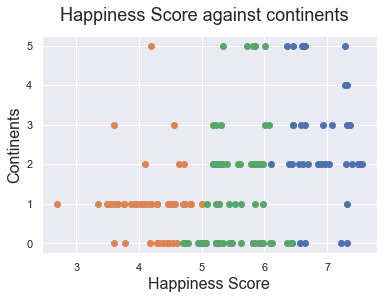

In [12]:
# Plot the results
for i in set(kproto.labels_):
    index = kproto.labels_ == i
    plt.plot(X[index, 0], X[index, 1], 'o')
    plt.suptitle('Happiness Score against continents', fontsize=18)
    plt.xlabel('Happiness Score', fontsize=16)
    plt.ylabel('Continents', fontsize=16)


plt.show()

Let's add the centroids to the graph:

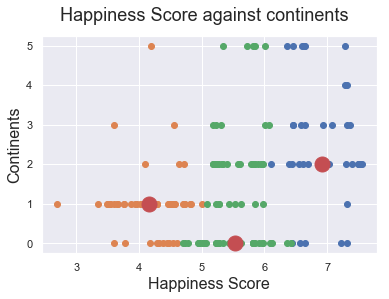

In [13]:
for i in set(kproto.labels_):
    index = kproto.labels_ == i
    plt.plot(X[index, 0], X[index, 1], 'o')
    plt.suptitle('Happiness Score against continents', fontsize=18)
    plt.xlabel('Happiness Score', fontsize=16)
    plt.ylabel('Continents', fontsize=16)

plt.plot(x1, y1,'r+',markersize=15, marker='o')
plt.plot(x2, y2,'r+',markersize=15, marker='o')
plt.plot(x3, y3,'r+',markersize=15, marker='o')

plt.show()

As can be seen from the graph above, the centroid of the least happiest cluster is located in continent 1 (which is Africa). This means that most countries in the least happiest cluster are in Africa. Similarly, the centroid of the happiest cluster is in continent 2 (which is Europe). This means most countries in the happiest cluster are clustered in Europe.

This answers our question: Africa is the least happiest continent whereas Europe is the happiest continent.